Import Libraries

In [510]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Load and Explore Dataset

In [511]:
# Hours_Studied: Number of hours the student studies per day or per week.
# Attendance: Percentage of classes the student attended.
# Parental_Involvement: Level of parents' engagement in the student's academic life (e.g., low/medium/high).
# Access_to_Resources: Availability of study materials (books, internet, laptop, etc.).
# Extracurricular_Activities: Participation in activities outside academics (sports, clubs, arts).
# Sleep_Hours: Average hours of sleep the student gets per night.
# Previous_Scores: Scores obtained by the student in previous exams.
# Motivation_Level: Student’s internal drive to study (often measured on a scale, e.g., 1–10).
# Internet_Access: Indicates whether the student has reliable internet access (yes/no or 0/1).
# Tutoring_Sessions: Number of tutoring or extra support sessions attended.
# Family_Income: Household income level of the student’s family.
# Teacher_Quality: Perceived or measured quality of teachers (rating or category).
# School_Type: Type of school the student attends (public, private, etc.).
# Peer_Influence: Effect of classmates/friends on the student’s academic behavior (positive/negative/neutral).
# Physical_Activity: Level of physical exercise per week (hours or rating).
# Learning_Disabilities: Whether the student has diagnosed learning disabilities (yes/no or 0/1).
# Parental_Education_Level: Highest education level achieved by parents.
# Distance_from_Home: Distance from the student's home to the school (in km or miles).
# Gender: Student’s gender.
# Exam_Score: Final exam score (target variable for prediction).

In [512]:
df = pd.read_csv("StudentPerformanceFactors.csv")

In [513]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6604,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6605,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6606,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6607,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [514]:
# check missing values
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6609 entries, 0 to 6608
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6609 non-null   int64 
 1   Attendance                  6609 non-null   int64 
 2   Parental_Involvement        6609 non-null   object
 3   Access_to_Resources         6609 non-null   object
 4   Extracurricular_Activities  6609 non-null   object
 5   Sleep_Hours                 6609 non-null   int64 
 6   Previous_Scores             6609 non-null   int64 
 7   Motivation_Level            6609 non-null   object
 8   Internet_Access             6609 non-null   object
 9   Tutoring_Sessions           6609 non-null   int64 
 10  Family_Income               6609 non-null   object
 11  Teacher_Quality             6531 non-null   object
 12  School_Type                 6609 non-null   object
 13  Peer_Influence              6609 non-null   obje

Fill missing values

In [516]:
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Exam_Score']

In [517]:
catg_cols = df.select_dtypes(include='object').columns
catg_cols

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [518]:
catg_impute = SimpleImputer(missing_values=np.nan , strategy='most_frequent')

In [519]:
num_missing_cols = [col for col in num_cols if df[col].isna().sum() > 0]
catg_missing_cols = [col for col in catg_cols if df[col].isna().sum() > 0]

In [520]:
num_missing_cols

[]

In [521]:
catg_missing_cols

['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

In [522]:
for col in catg_missing_cols:
    df[col] = catg_impute.fit_transform(df[[col]]).ravel()

In [523]:
# check missing values after impute
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [524]:
# check duplicates
df.duplicated().sum()

np.int64(2)

In [525]:
# drop duplicates
df = df.drop_duplicates()

In [526]:
# check duplicates after
df.duplicated().sum()

np.int64(0)

In [527]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


Encode catg cols

In [528]:
catg_cols

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [529]:
# ['Parental_Involvement' -> Ordinal encoder
# , 'Access_to_Resources', -> Ordinal encoder
#  'Extracurricular_Activities' -> Label Encoder
# ,'Motivation_Level', -> Ordinal encoder
# 'Internet_Access',  -> Label Encoder
#  'Family_Income', -> Ordinal encoder
#  'Teacher_Quality', -> Ordinal encoder
# 'School_Type',  -> Label Encoder
# 'Peer_Influence', -> Ordinal encoder
#  'Learning_Disabilities', -> Label Encoder
#  'Parental_Education_Level',  -> Label Encoder
#  'Distance_from_Home', -> Ordinal encoder
#  'Gender'  -> Label Encoder
# ] 

In [530]:
# Create individual encoders for each column to handle user input correctly
l_encoders = {}
od_encoders = {}

# Label encoders for binary/categorical columns
label_cols = ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 
              'Learning_Disabilities', 'Parental_Education_Level', 'Gender']

for col in label_cols:
    l_encoders[col] = LabelEncoder()
    df[col] = l_encoders[col].fit_transform(df[col])

# Ordinal encoders for ordinal columns
ordinal_cols = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 
                'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Distance_from_Home']

for col in ordinal_cols:
    od_encoders[col] = OrdinalEncoder()
    df[col] = od_encoders[col].fit_transform(df[[col]])

print("✅ Encoders created for all categorical columns")

✅ Encoders created for all categorical columns


C:\Users\Bassam\AppData\Local\Temp\ipykernel_43972\1375356911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = l_encoders[col].fit_transform(df[col])
C:\Users\Bassam\AppData\Local\Temp\ipykernel_43972\1375356911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = l_encoders[col].fit_transform(df[col])
C:\Users\Bassam\AppData\Local\Temp\ipykernel_43972\1375356911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [531]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1.0,0.0,0,7,73,1.0,1,0,1.0,2.0,1,2.0,3,0,1,2.0,1,67
1,19,64,1.0,2.0,0,8,59,1.0,1,2,2.0,2.0,1,0.0,4,0,0,1.0,0,61
2,24,98,2.0,2.0,1,7,91,2.0,1,2,2.0,2.0,1,1.0,4,0,2,2.0,1,74
3,29,89,1.0,2.0,1,8,98,2.0,1,1,2.0,2.0,1,0.0,4,0,1,1.0,1,71
4,19,92,2.0,2.0,1,6,65,2.0,1,3,2.0,0.0,1,1.0,4,0,0,2.0,0,70
5,19,88,2.0,2.0,1,8,89,2.0,1,3,2.0,2.0,1,2.0,3,0,2,2.0,1,71
6,29,84,2.0,1.0,1,7,68,1.0,1,1,1.0,2.0,0,1.0,2,0,1,1.0,1,67
7,25,78,1.0,0.0,1,6,50,2.0,1,1,0.0,0.0,1,0.0,2,0,1,0.0,1,66
8,17,94,2.0,0.0,0,6,80,0.0,1,0,2.0,1.0,0,1.0,1,0,0,2.0,1,69
11,23,98,2.0,2.0,1,8,71,2.0,1,0,0.0,0.0,1,2.0,5,0,1,1.0,1,72


In [532]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1.0,0.0,0,7,73,1.0,1,0,1.0,2.0,1,2.0,3,0,1,2.0,1,67
1,19,64,1.0,2.0,0,8,59,1.0,1,2,2.0,2.0,1,0.0,4,0,0,1.0,0,61
2,24,98,2.0,2.0,1,7,91,2.0,1,2,2.0,2.0,1,1.0,4,0,2,2.0,1,74
3,29,89,1.0,2.0,1,8,98,2.0,1,1,2.0,2.0,1,0.0,4,0,1,1.0,1,71
4,19,92,2.0,2.0,1,6,65,2.0,1,3,2.0,0.0,1,1.0,4,0,0,2.0,0,70
5,19,88,2.0,2.0,1,8,89,2.0,1,3,2.0,2.0,1,2.0,3,0,2,2.0,1,71
6,29,84,2.0,1.0,1,7,68,1.0,1,1,1.0,2.0,0,1.0,2,0,1,1.0,1,67
7,25,78,1.0,0.0,1,6,50,2.0,1,1,0.0,0.0,1,0.0,2,0,1,0.0,1,66
8,17,94,2.0,0.0,0,6,80,0.0,1,0,2.0,1.0,0,1.0,1,0,0,2.0,1,69
11,23,98,2.0,2.0,1,8,71,2.0,1,0,0.0,0.0,1,2.0,5,0,1,1.0,1,72


Check Outliers

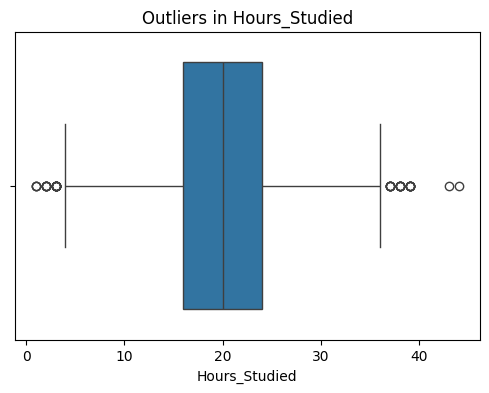

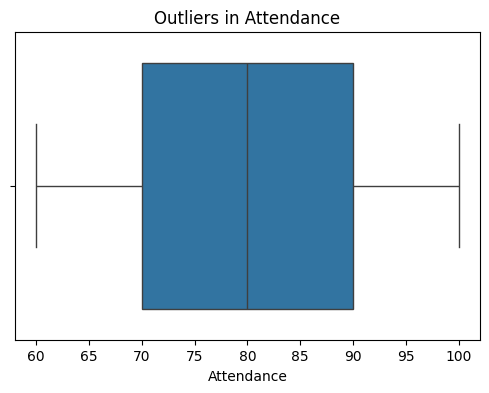

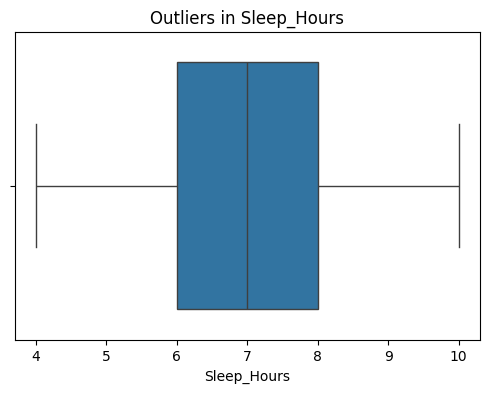

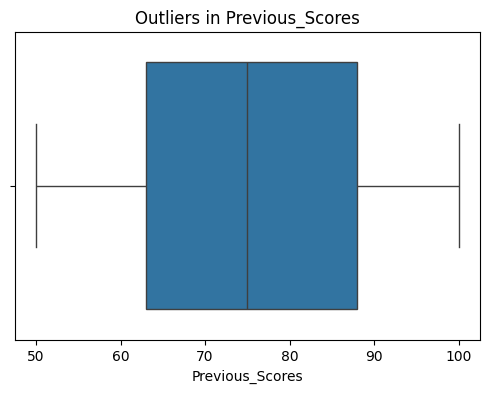

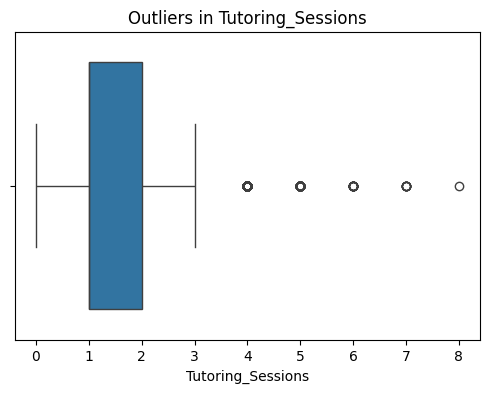

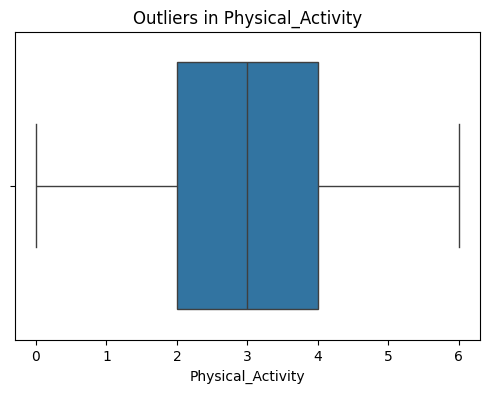

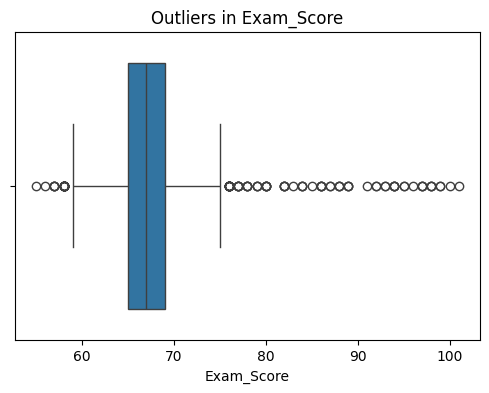

In [533]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [534]:
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

# Columns to fix
cols = ['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']

for col in cols:
    handle_outliers(df, col)

C:\Users\Bassam\AppData\Local\Temp\ipykernel_43972\661922035.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower, upper)
C:\Users\Bassam\AppData\Local\Temp\ipykernel_43972\661922035.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower, upper)
C:\Users\Bassam\AppData\Local\Temp\ipykernel_43972\661922035.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

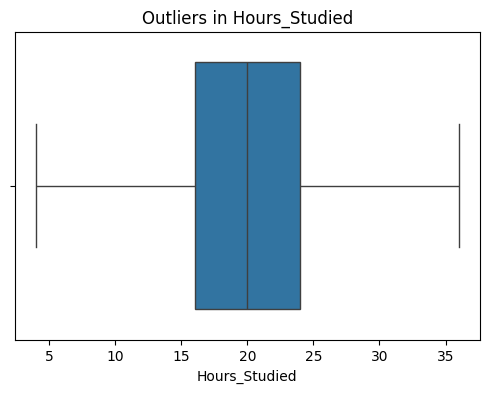

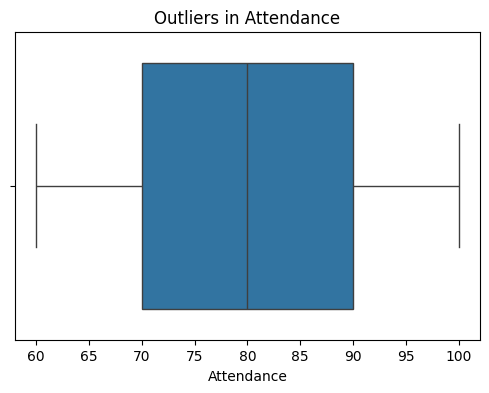

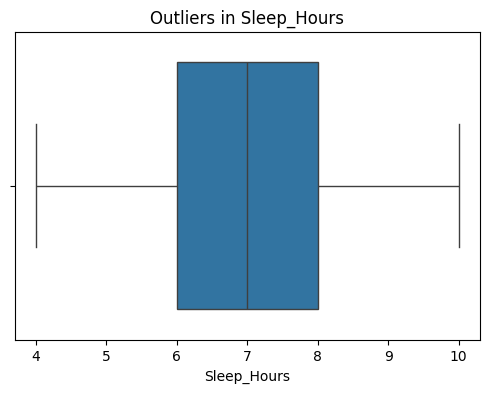

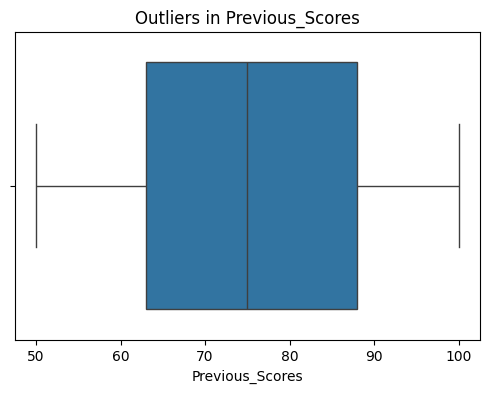

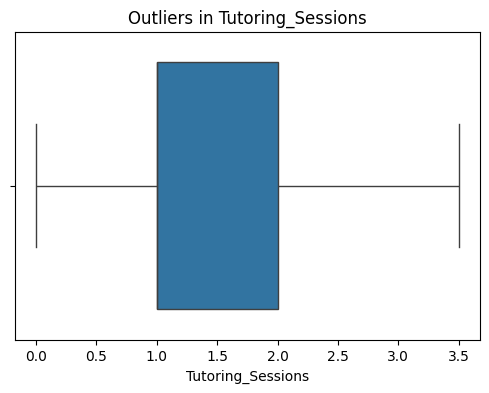

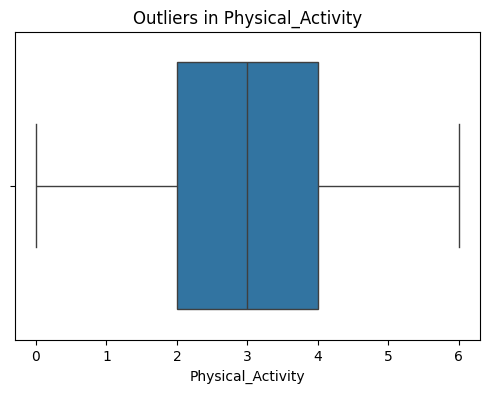

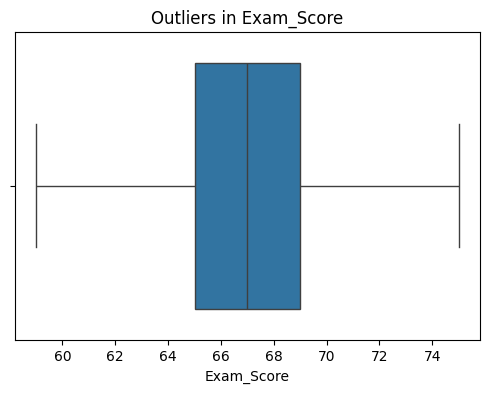

In [535]:
# check outliers after handling
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

Check Imbalanced

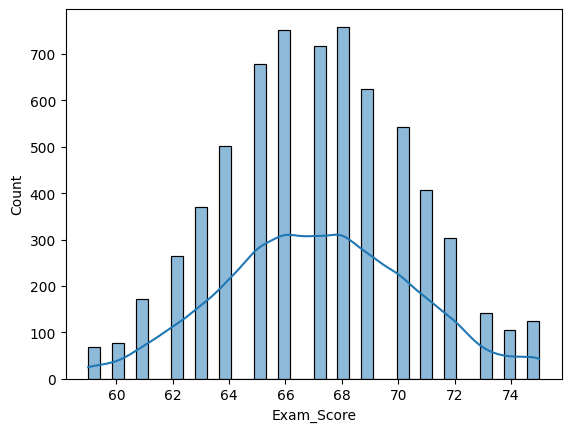

In [536]:
# check balanced dataset or not
sns.histplot(df,x='Exam_Score',kde=True)
plt.show()

In [537]:
# Handle Imbalanced
df['Exam_Score_log'] = np.log1p(df['Exam_Score'])

C:\Users\Bassam\AppData\Local\Temp\ipykernel_43972\516562522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Exam_Score_log'] = np.log1p(df['Exam_Score'])


In [538]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Exam_Score_log
0,23,84,1.0,0.0,0,7,73,1.0,1,0.0,...,2.0,1,2.0,3,0,1,2.0,1,67,4.219508
1,19,64,1.0,2.0,0,8,59,1.0,1,2.0,...,2.0,1,0.0,4,0,0,1.0,0,61,4.127134
2,24,98,2.0,2.0,1,7,91,2.0,1,2.0,...,2.0,1,1.0,4,0,2,2.0,1,74,4.317488
3,29,89,1.0,2.0,1,8,98,2.0,1,1.0,...,2.0,1,0.0,4,0,1,1.0,1,71,4.276666
4,19,92,2.0,2.0,1,6,65,2.0,1,3.0,...,0.0,1,1.0,4,0,0,2.0,0,70,4.262680
5,19,88,2.0,2.0,1,8,89,2.0,1,3.0,...,2.0,1,2.0,3,0,2,2.0,1,71,4.276666
6,29,84,2.0,1.0,1,7,68,1.0,1,1.0,...,2.0,0,1.0,2,0,1,1.0,1,67,4.219508
7,25,78,1.0,0.0,1,6,50,2.0,1,1.0,...,0.0,1,0.0,2,0,1,0.0,1,66,4.204693
8,17,94,2.0,0.0,0,6,80,0.0,1,0.0,...,1.0,0,1.0,1,0,0,2.0,1,69,4.248495
11,23,98,2.0,2.0,1,8,71,2.0,1,0.0,...,0.0,1,2.0,5,0,1,1.0,1,72,4.290459


Data Split Process

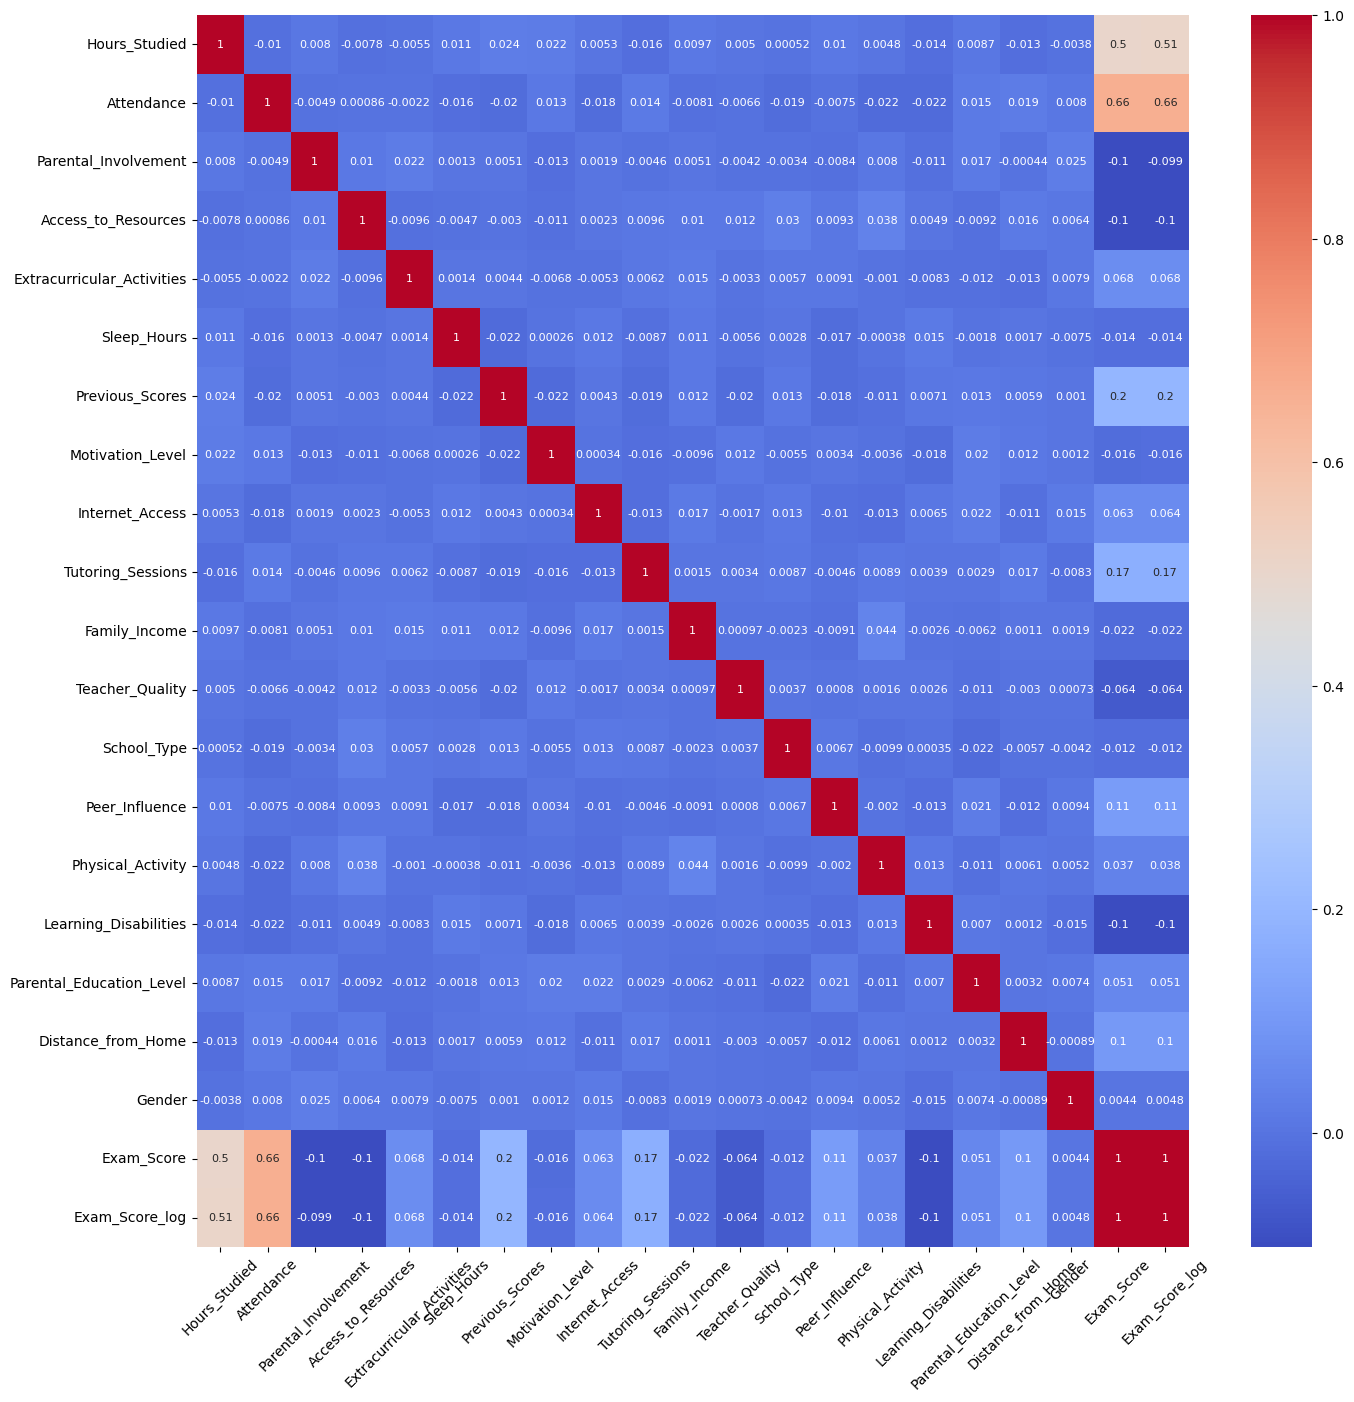

In [539]:
df_corr = df.corr()

plt.figure(figsize=(16,16))
sns.heatmap(df_corr, annot=True , cmap="coolwarm" ,  annot_kws={"size":8})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [540]:
selected_features = [
    'Attendance',
    'Hours_Studied',
    'Previous_Scores',
    'Tutoring_Sessions',
    'Motivation_Level',
    'Peer_Influence',
    'Teacher_Quality',
    'Distance_from_Home'
]

In [541]:
X = df[selected_features]
y = df['Exam_Score_log']

In [542]:
X.head()

,Attendance,Hours_Studied,Previous_Scores,Tutoring_Sessions,Motivation_Level,Peer_Influence,Teacher_Quality,Distance_from_Home
0,84,23,73,0.0,1.0,2.0,2.0,2.0
1,64,19,59,2.0,1.0,0.0,2.0,1.0
2,98,24,91,2.0,2.0,1.0,2.0,2.0
3,89,29,98,1.0,2.0,0.0,2.0,1.0
4,92,19,65,3.0,2.0,1.0,0.0,2.0


In [543]:
y.head()

0    4.219508
1    4.127134
2    4.317488
3    4.276666
4    4.262680
Name: Exam_Score_log, dtype: float64

In [544]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [545]:
scaler = StandardScaler()

In [546]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [547]:
num_cols_to_scale = [
    'Attendance',
    'Hours_Studied',
    'Previous_Scores',
    'Tutoring_Sessions'
]

num_cols_to_scale

['Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions']

In [548]:
X_train_scaled[num_cols_to_scale] = scaler.fit_transform(X_train[num_cols_to_scale])
X_test_scaled[num_cols_to_scale] = scaler.transform(X_test[num_cols_to_scale])

Create Linear Regression model

In [549]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [550]:
# Make predictions
lr_pred = lr_model.predict(X_test_scaled)

In [551]:
#  Convert predictions back to original exam scores
lr_pred_original = np.exp(lr_pred)  

# Convert actual y_test back as well
y_test_original = np.exp(y_test)

 Evaluate model


In [552]:
mse_original = mean_squared_error(y_test_original, lr_pred_original)
rmse_original = np.sqrt(mse_original)
mae_original = mean_absolute_error(y_test_original, lr_pred_original)
r2_original = r2_score(y_test_original, lr_pred_original)

print("R² Score:", r2_original)
print("MSE:", mse_original)
print("RMSE:", rmse_original)
print("MAE:", mae_original)

R² Score: 0.8094362862184752
MSE: 2.148246473214338
RMSE: 1.4656897602201968
MAE: 1.0937607908169602


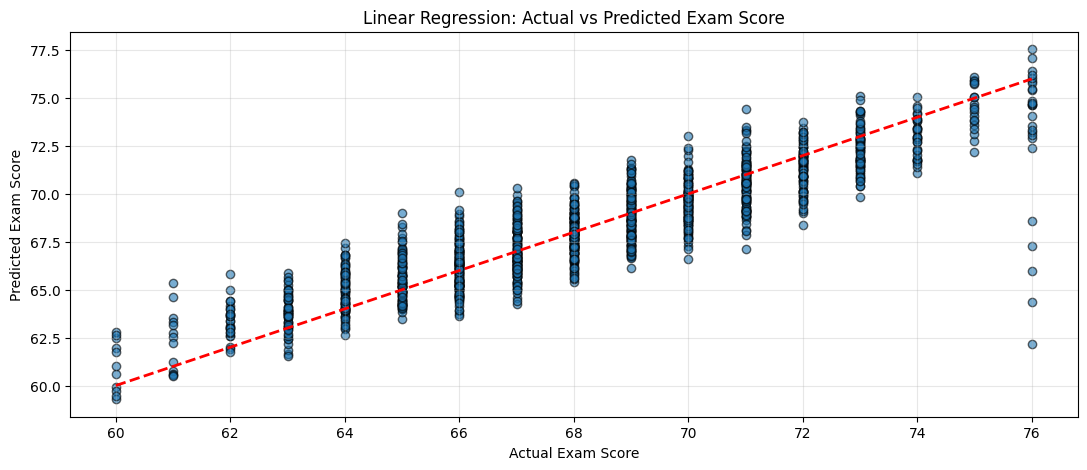

In [553]:
# Visualize predictions
plt.figure(figsize=(13, 5))
plt.scatter(y_test_original, lr_pred_original, alpha=0.6, edgecolors='k')
plt.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Linear Regression: Actual vs Predicted Exam Score")
plt.grid(True, alpha=0.3)
plt.show()

User input

In [554]:
def predict_student_exam_score():
    """
    Interactive function to collect ONLY selected features for prediction.
    """

    print("\n" + "="*70)
    print("📚 STUDENT EXAM SCORE PREDICTION SYSTEM".center(70))
    print("="*70)
    print("\nPlease enter the student's study factors and details:\n")

    # ------------------- Helper Functions -------------------
    def get_valid_number(prompt, min_val=None, max_val=None):
        while True:
            try:
                val = float(input(f"{prompt}: "))
                if min_val is not None and val < min_val:
                    print(f"❌ Value must be at least {min_val}")
                    continue
                if max_val is not None and val > max_val:
                    print(f"❌ Value must be at most {max_val}")
                    continue
                return val
            except ValueError:
                print("❌ Invalid input! Please enter a valid number.")

    def get_valid_choice(prompt, choices):
        while True:
            print(f"Available options: {', '.join(choices)}")
            val = input(f"{prompt}: ").strip()
            if val in choices:
                return val
            print(f"❌ Invalid input! Please enter one of: {', '.join(choices)}")

    # ------------------- Collect Inputs for Selected Features -------------------
    inputs = {}
    for feature in selected_features:
        if feature in num_cols_to_scale:
            # Numeric feature
            if feature == "Attendance":
                inputs[feature] = get_valid_number("Attendance (%)", 0, 100)
            elif feature == "Hours_Studied":
                inputs[feature] = get_valid_number("Hours Studied (per week)", 0, 40)
            elif feature == "Previous_Scores":
                inputs[feature] = get_valid_number("Previous Test Score (%)", 0, 100)
            elif feature == "Tutoring_Sessions":
                inputs[feature] = get_valid_number("Tutoring Sessions (per month)", 0, 20)
            else:
                inputs[feature] = get_valid_number(f"{feature}")
        else:
            # Categorical/ordinal feature → use od_encoders or l_encoders
            if feature in od_encoders:
                inputs[feature] = get_valid_choice(
                    feature.replace("_", " "), 
                    od_encoders[feature].categories_[0].tolist()
                )
            elif feature in l_encoders:
                inputs[feature] = get_valid_choice(
                    feature.replace("_", " "), 
                    l_encoders[feature].classes_.tolist()
                )

    # ------------------- Create DataFrame -------------------
    user_input = pd.DataFrame([inputs])

    # ------------------- Encode Categorical Features -------------------
    for col in selected_features:
        if col in l_encoders:
            user_input[col] = l_encoders[col].transform(user_input[col])
        elif col in od_encoders:
            user_input[col] = od_encoders[col].transform(user_input[[col]])

    # ------------------- Scale Numeric Columns -------------------
    user_input_scaled = user_input.copy()
    user_input_scaled[num_cols_to_scale] = scaler.transform(user_input[num_cols_to_scale])

    # ------------------- Make Prediction -------------------
    prediction_log = lr_model.predict(user_input_scaled[selected_features])[0]
    predicted_score = np.expm1(prediction_log)

    # ------------------- Display Results -------------------
    print("\n" + "="*70)
    print("📊 PREDICTION RESULTS".center(70))
    print("="*70)
    print(f"\n🎯 Predicted Exam Score: {predicted_score:.2f}%")
    print("="*70)

    return predicted_score


In [555]:
exam_prediction1 = predict_student_exam_score()


                📚 STUDENT EXAM SCORE PREDICTION SYSTEM                

Please enter the student's study factors and details:

Available options: High, Low, Medium
Available options: Negative, Neutral, Positive
Available options: High, Low, Medium
❌ Invalid input! Please enter one of: High, Low, Medium
Available options: High, Low, Medium
Available options: Far, Moderate, Near

                         📊 PREDICTION RESULTS                         

🎯 Predicted Exam Score: 77.15%


In [556]:
exam_prediction2 = predict_student_exam_score()


                📚 STUDENT EXAM SCORE PREDICTION SYSTEM                

Please enter the student's study factors and details:

Available options: High, Low, Medium
Available options: Negative, Neutral, Positive
Available options: High, Low, Medium
Available options: Far, Moderate, Near
❌ Invalid input! Please enter one of: Far, Moderate, Near
Available options: Far, Moderate, Near

                         📊 PREDICTION RESULTS                         

🎯 Predicted Exam Score: 64.18%
